In [7]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')    # import csv file
data.head()  

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [10]:
data.shape

(9134, 24)

In [11]:
data.columns=[e.lower().replace(' ', '_') for e in data.columns]   # lower and replace
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [13]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')

In [14]:
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [16]:
data = data.drop_duplicates()  #dropping duplicates
data.shape

(9134, 24)

In [17]:
def cols_dtypes(df):
    """retrns data types of columns of a dataframe in form of a dataframe, the values beeing the feature/variable names"""
    categoricals = df.select_dtypes(include='object').columns
    numerics = df.select_dtypes(exclude='object').columns
    booleans = df.select_dtypes(include='bool').columns
    floats = df.select_dtypes(include='float').columns
    integers = df.select_dtypes(include='int').columns
    data_types = pd.DataFrame([categoricals,numerics, booleans, floats, integers])
    data_types = data_types.T
    data_types.columns=['catergoricals or mixed', 'nuermicals', 'booleans','floats', 'integers']
    return data_types

In [18]:
cols_dtypes(data)

,catergoricals or mixed,nuermicals,booleans,floats,integers
0,customer,customer_lifetime_value,None,customer_lifetime_value,income
1,state,effective_to_date,None,total_claim_amount,monthly_premium_auto
2,response,income,None,None,months_since_last_claim
3,coverage,monthly_premium_auto,None,None,months_since_policy_inception
4,education,months_since_last_claim,None,None,number_of_open_complaints
5,employmentstatus,months_since_policy_inception,None,None,number_of_policies
6,gender,number_of_open_complaints,None,None,None
7,location_code,number_of_policies,None,None,None
8,marital_status,total_claim_amount,None,None,None
9,policy_type,None,None,None,None


In [30]:
continous = data.select_dtypes(exclude='object')
discrete = data.select_dtypes(include='object')

In [31]:
discrete.head()


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [32]:
continous.head()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,2011-02-24,56274,69,32,5,0,1,384.811147
1,6979.535903,2011-01-31,0,94,13,42,0,8,1131.464935
2,12887.431650,2011-02-19,48767,108,18,38,0,2,566.472247
3,7645.861827,2011-01-20,0,106,18,65,0,7,529.881344
4,2813.692575,2011-02-03,43836,73,12,44,0,1,138.130879


In [29]:
data['effective_to_date'][0].month

2

In [47]:
data.vehicle_size.unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [49]:
discrete = discrete.drop(['customer'], axis=1)

In [50]:
cat_cols= discrete.columns

print('Categorical Features:', len(cat_cols))
print('----------')
for c in cat_cols:
    print('Name: {}'.format(data[c].name))    # column name
    print('Type: {}'.format(data[c].dtype))   # column type
    print('Unique values: {}'.format(len(data[c].unique())))   # column unique values
    print(data[c].unique())
    print(((data[c].value_counts()/ sum(data[c].value_counts()))*100))   # percentage
    print('\n----------')

Categorical Features: 14
----------
Name: state
Type: object
Unique values: 5
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: state, dtype: float64

----------
Name: response
Type: object
Unique values: 2
['No' 'Yes']
No     85.679877
Yes    14.320123
Name: response, dtype: float64

----------
Name: coverage
Type: object
Unique values: 3
['Basic' 'Extended' 'Premium']
Basic       60.959054
Extended    30.019707
Premium      9.021239
Name: coverage, dtype: float64

----------
Name: education
Type: object
Unique values: 5
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: education, dtype: float64

----------
Name: employmentstatus
Type: object
Unique values: 5
['Employe

In [51]:
m = data['customer'].str.isnumeric()

0    False
1    False
2    False
3    False
4    False
Name: customer, dtype: bool

In [54]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [55]:
continous_df = data.select_dtypes(exclude='object')
discrete_df = data.select_dtypes(include='object')

In [64]:
discrete_df = discrete_df.drop(['customer'], axis=1)

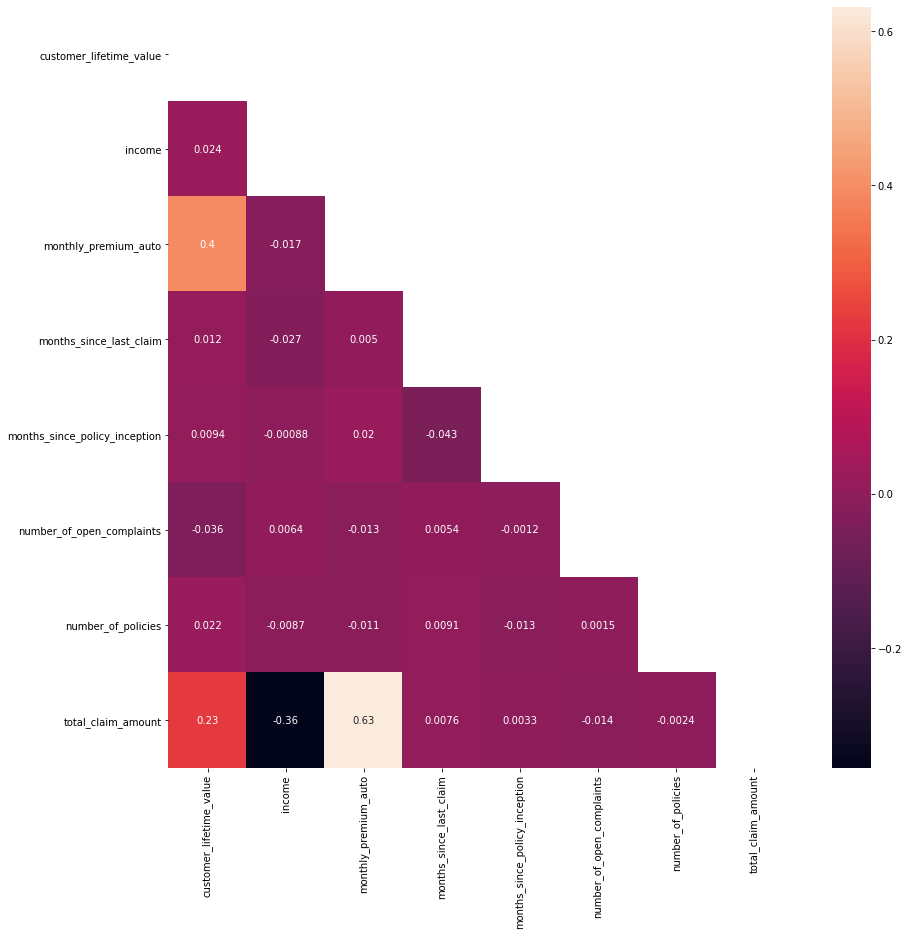

In [74]:
correlations_matrix = continous_df.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(14, 14))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

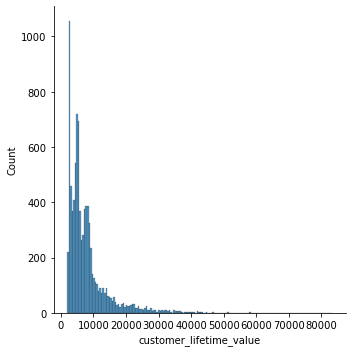

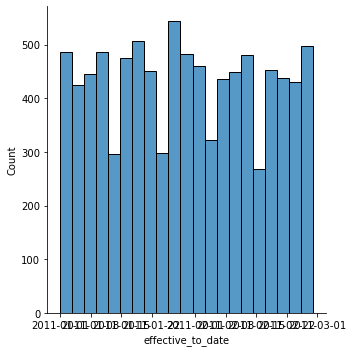

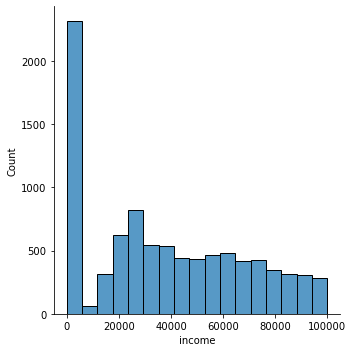

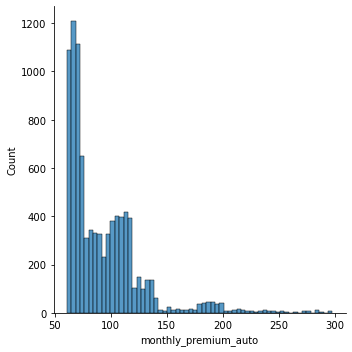

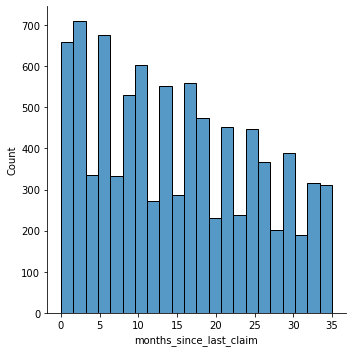

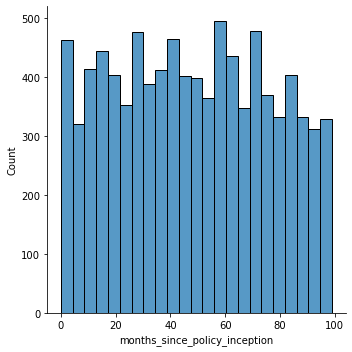

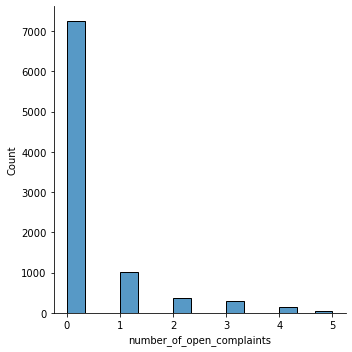

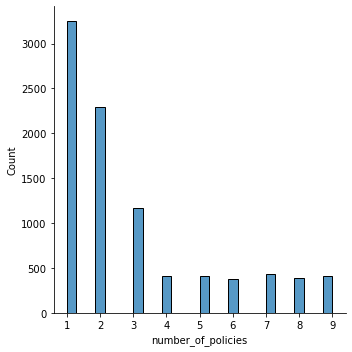

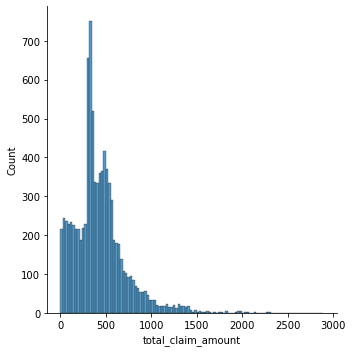

In [72]:
for x in continous_df.columns:
    sns.displot(continous_df[x])
plt.show()

In [75]:
def df_bar(df):
    sns.set(rc={'figure.figsize':(16,8)})
    
    for i,col in enumerate (df):
        plt.figure(i)
        sns.barplot(x=df[col].value_counts().index, y = df[col].value_counts())
        plt.show()

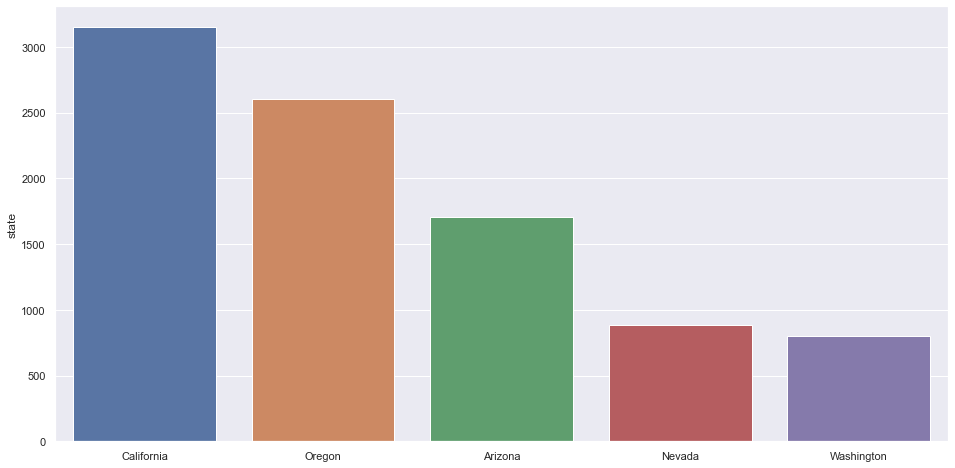

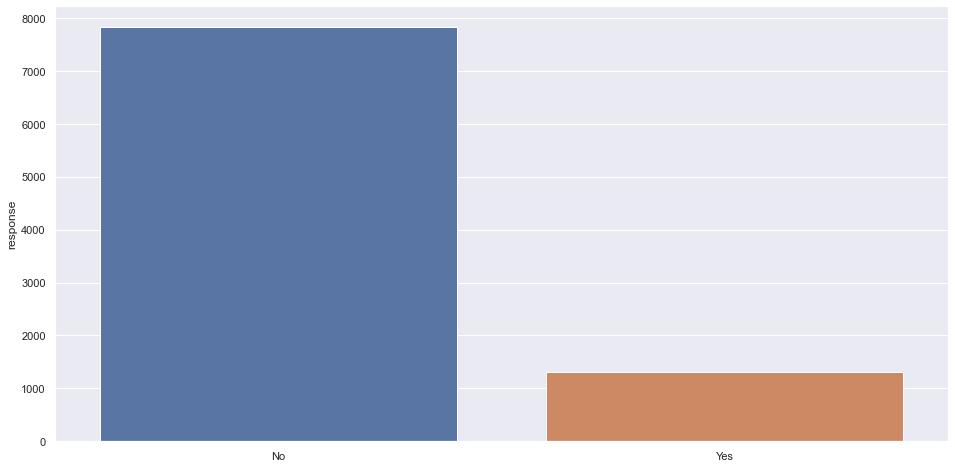

In [77]:
df_bar(discrete_df[['state','response']])

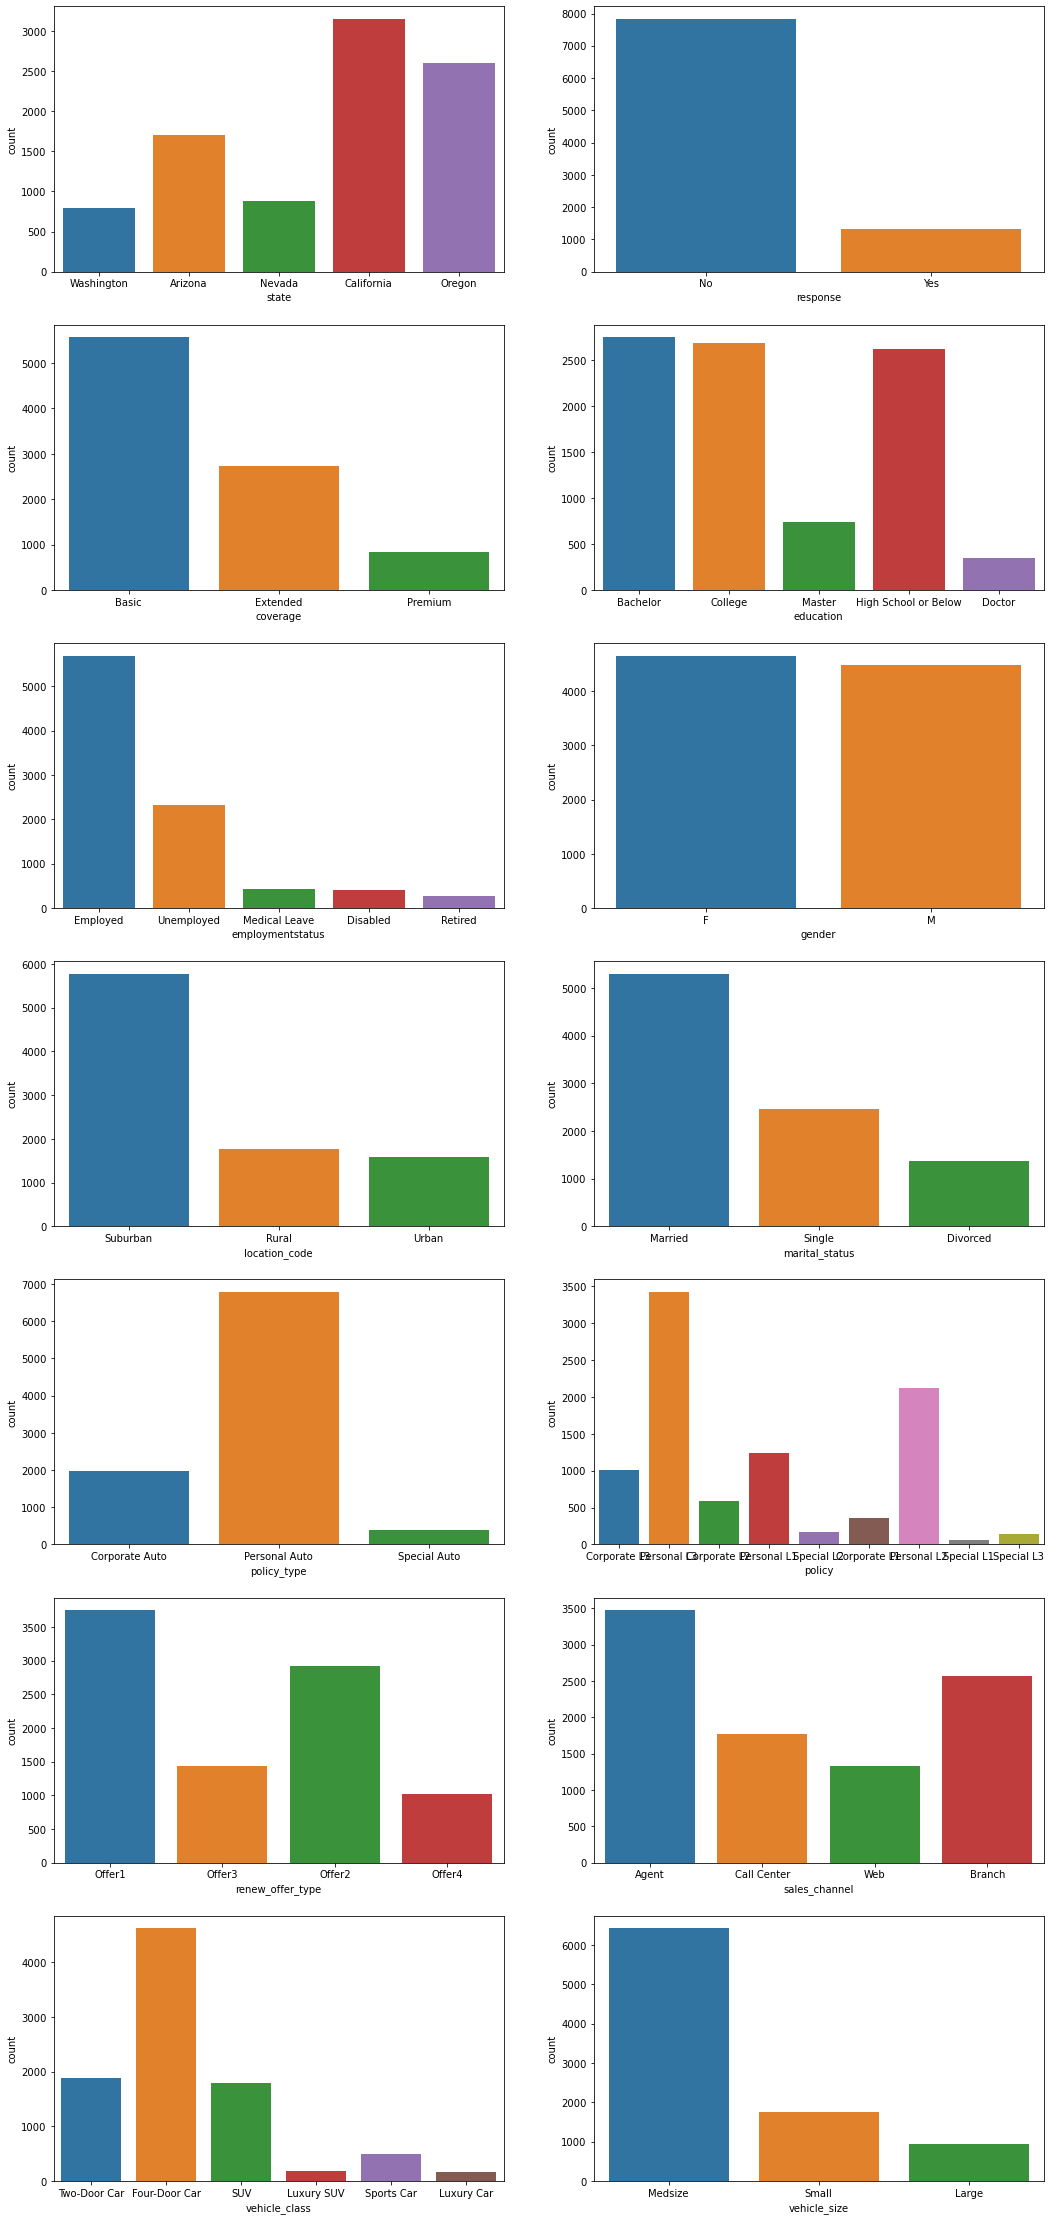

In [69]:
data_disc_cols = discrete_df.columns
fig,axs = plt.subplots(ncols=7, nrows=2, figsize =(10, 40))
plt.subplots_adjust(right=1.5)
for i, feature in enumerate(data_disc_cols, 1):
    plt.subplot(7, 2, i)
    sns.countplot(x = feature, data= discrete_df)
plt.show()

In [78]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [79]:
def df_bar(df):
    sns.set(rc={'figure.figsize':(16,8)})
    
    for i,col in enumerate (df):
        plt.figure(i)
        sns.barplot(x=df[col].value_counts().index, y = df[col].value_counts())
        plt.show()

In [81]:
categoricals = categoricals.drop(['customer'], axis=1)

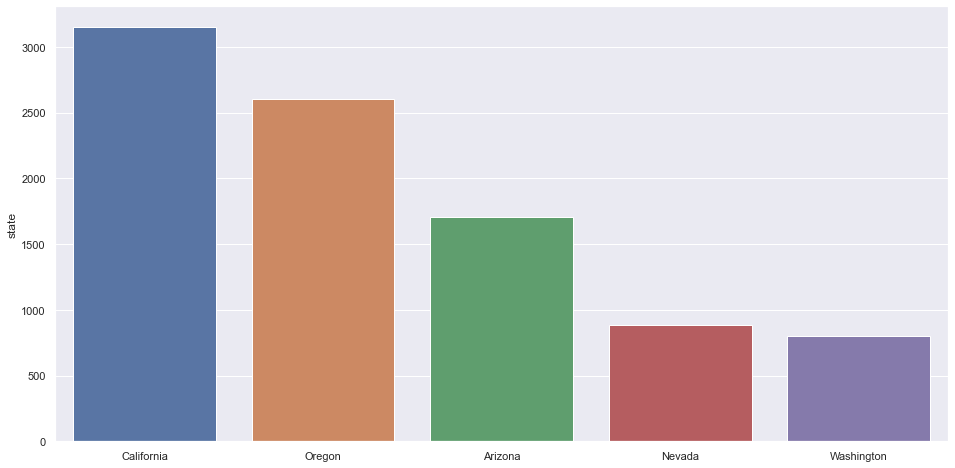

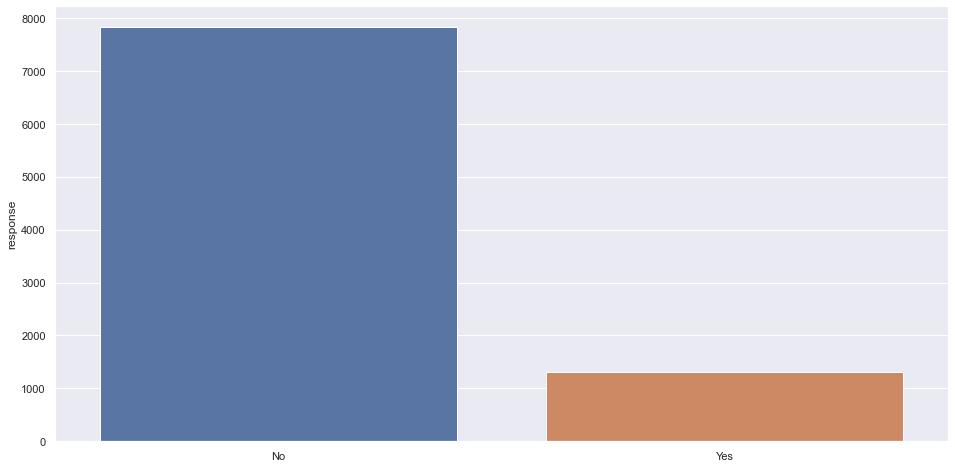

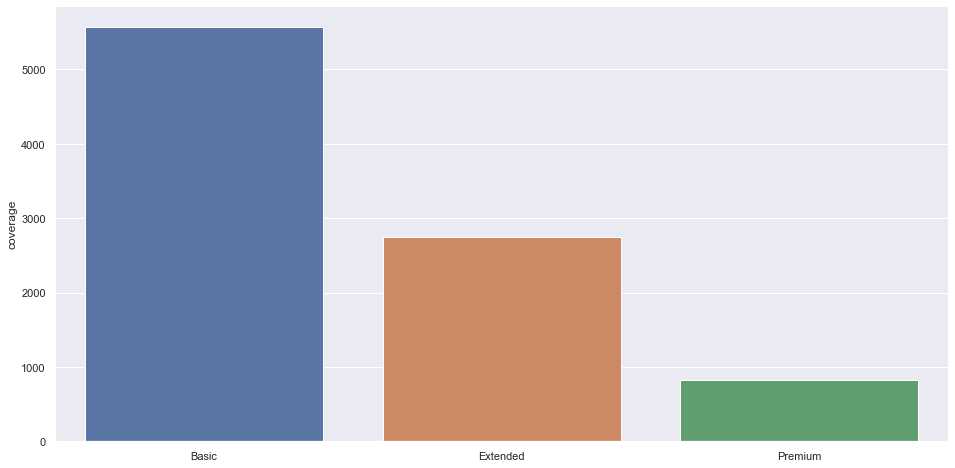

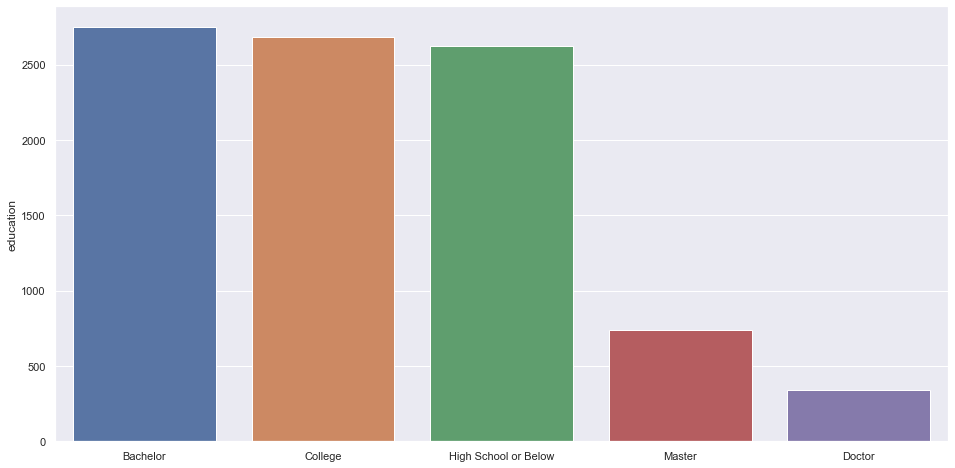

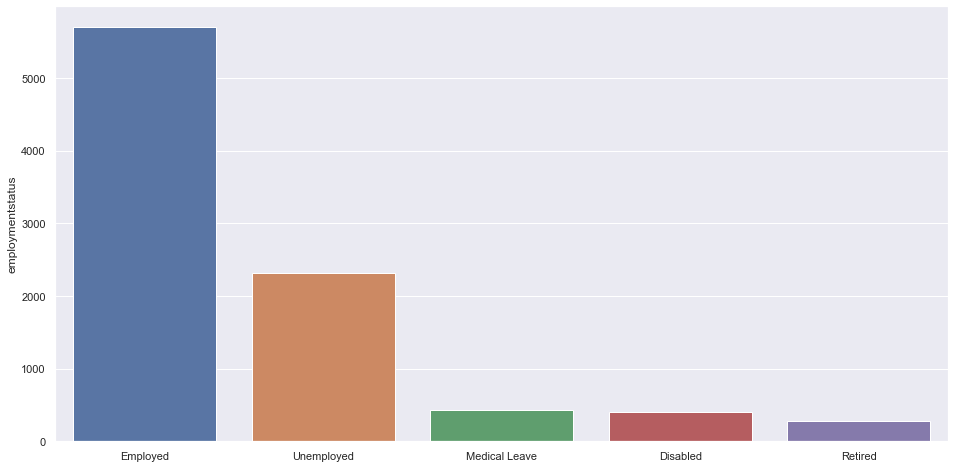

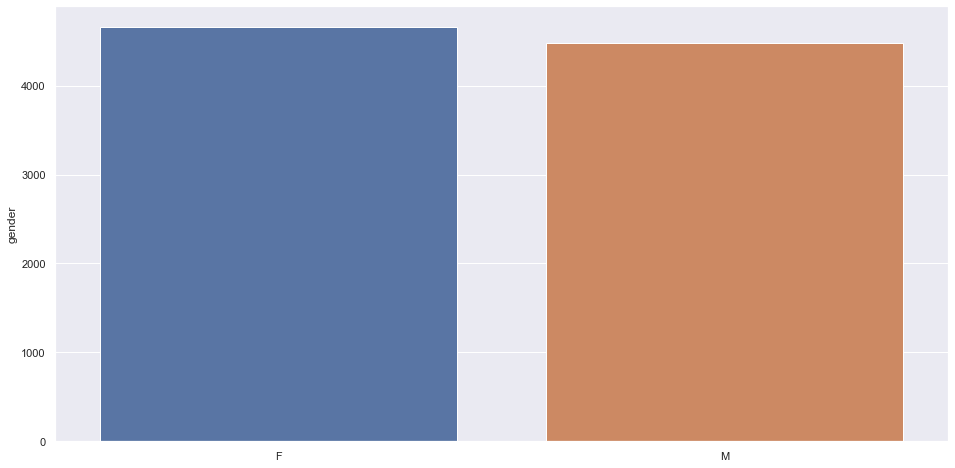

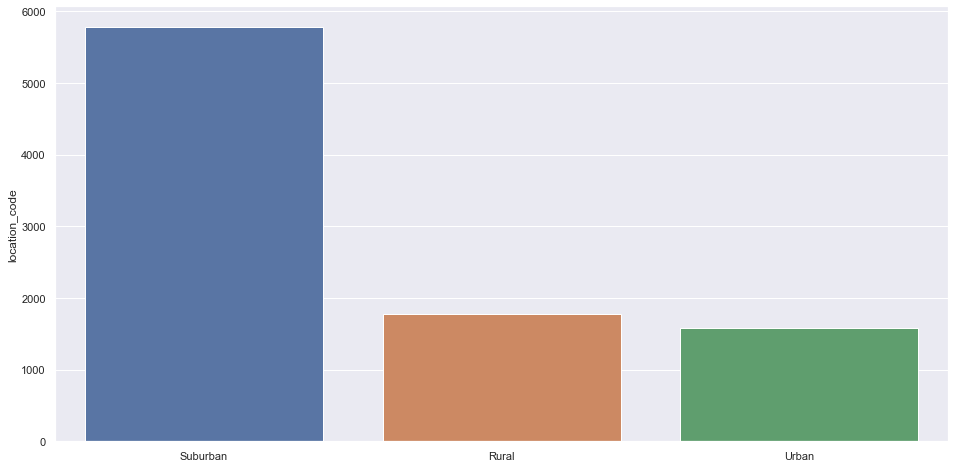

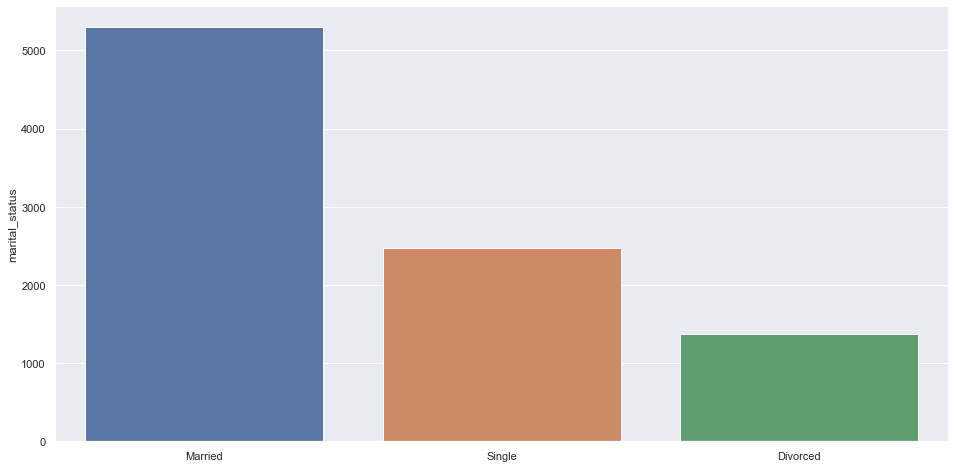

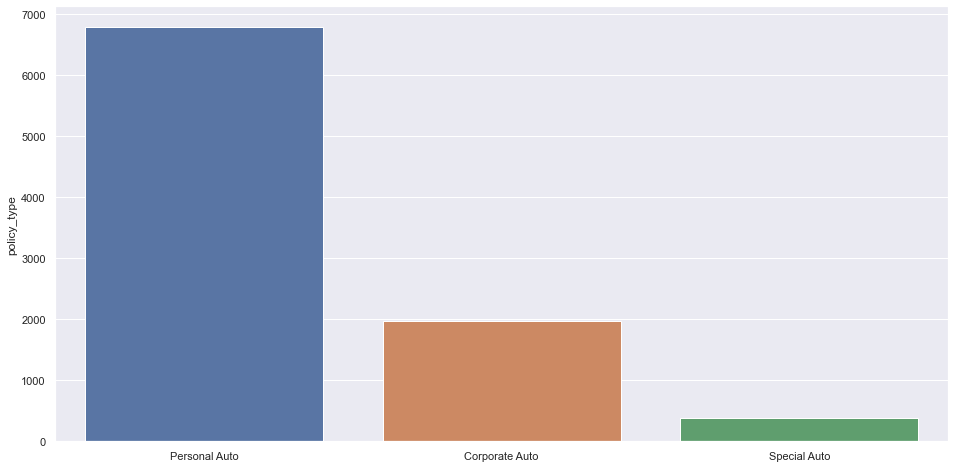

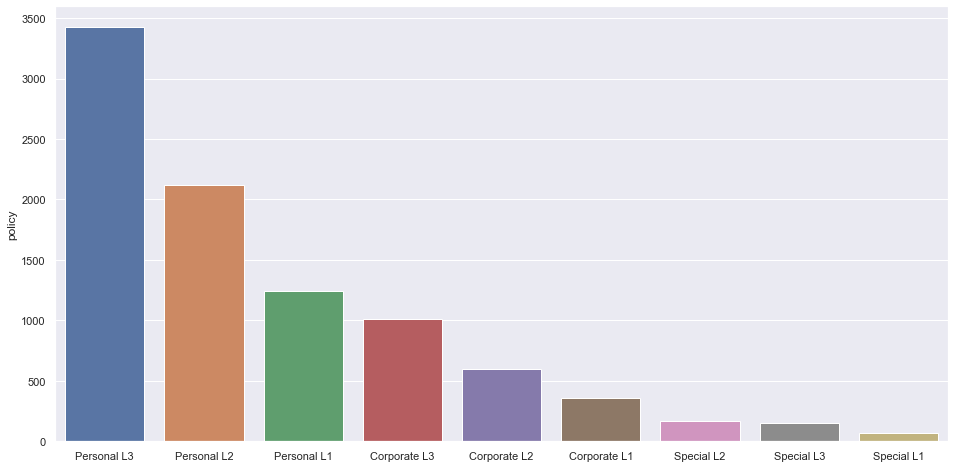

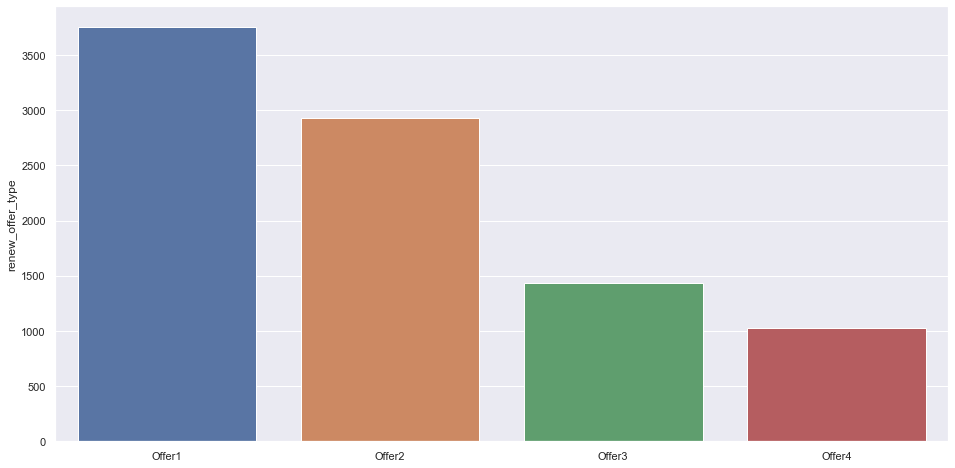

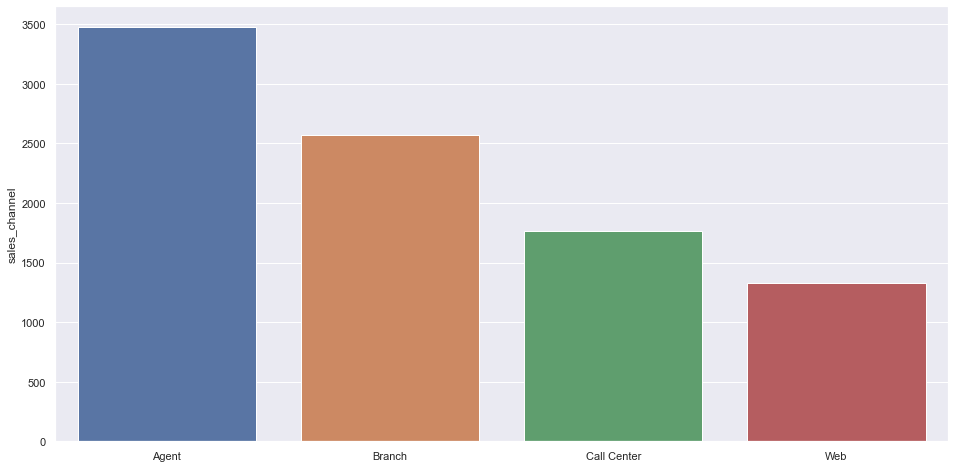

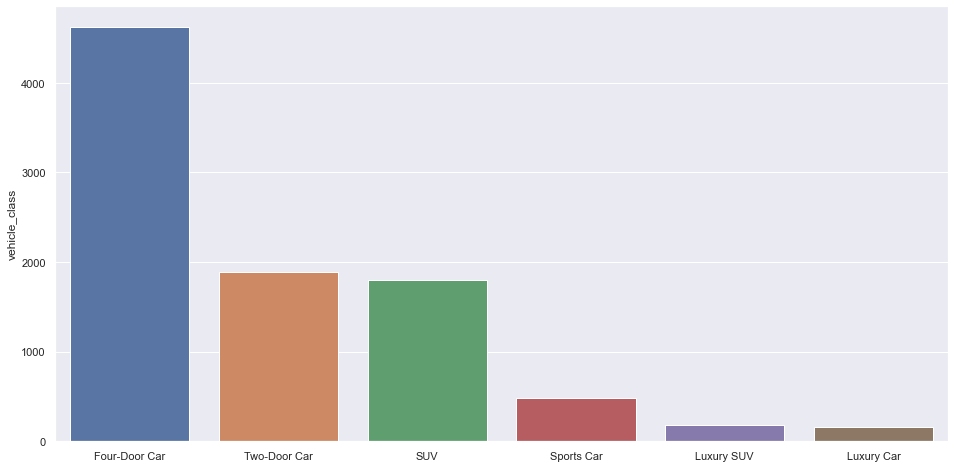

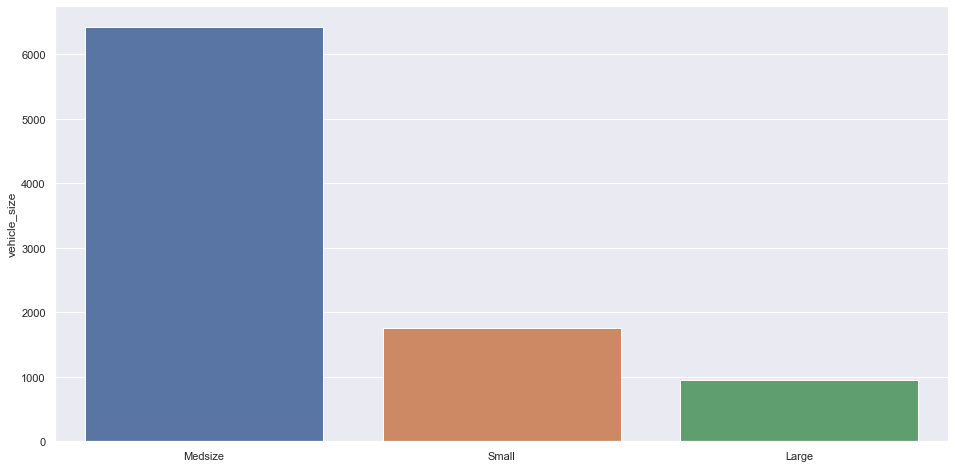

In [82]:
df_bar(categoricals)

In [9]:
nums = data.select_dtypes(np.number)
nums.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


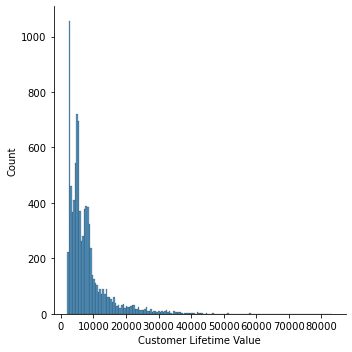

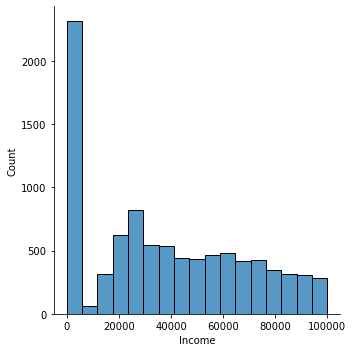

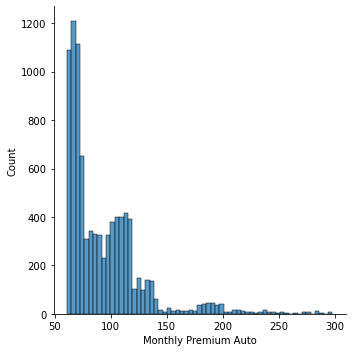

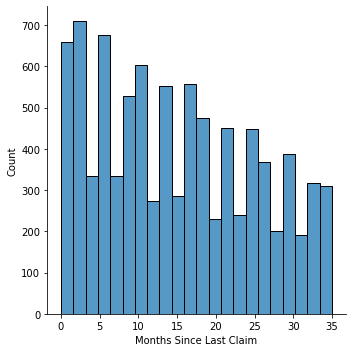

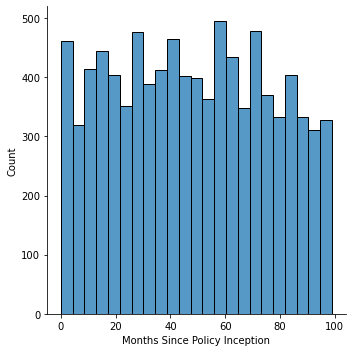

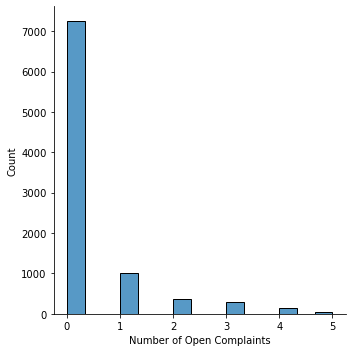

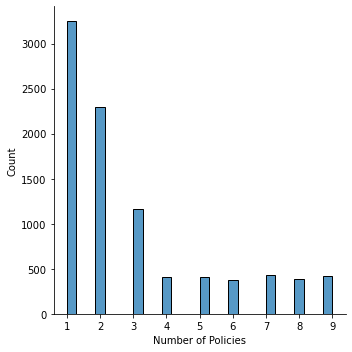

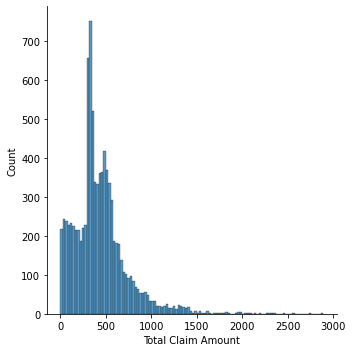

In [11]:

for x in nums.columns:
    sns.displot(nums[x])
plt.show()